1. What is Boosting in Machine Learning?
 - Boosting is an ensemble technique that builds models sequentially, where each model attempts to correct the errors made by the previous ones. The final prediction is a weighted combination of all models. It aims to convert weak learners into a strong learner.

2.  How does Boosting differ from Bagging?
 - Use Bagging when your model overfits and has high variance (e.g., decision trees).

 - Use Boosting when you want to improve accuracy and reduce bias, especially if your base model underfits.

3. What is the key idea behind AdaBoost?
The key idea of AdaBoost (Adaptive Boosting) is to focus more on misclassified examples by assigning them higher weights in the next model. Each new weak learner is trained on a re-weighted dataset and contributes to the final prediction based on its accuracy.

4. Explain the working of AdaBoost with an example.
 - Train the first weak learner (e.g., Decision Stump) on original data.

  - Compute error rate and assign weight to the learner.

   - Increase weights of misclassified samples.

  - Train the next learner on this updated data.

 - Repeat for multiple learners.

 - Combine all learners using a weighted vote.


5. What is Gradient Boosting, and how is it different from AdaBoost?
 - Gradient Boosting builds models sequentially like AdaBoost, but instead of reweighting samples, it fits the new model on the residuals (errors) of the previous one using gradient descent to minimize a loss function.

6. What is the loss function in Gradient Boosting?
 - The loss function in Gradient Boosting depends on the task:

    - Regression: Mean Squared Error (MSE) or MAE

    - Classification: Log Loss (Binary Cross-Entropy)

 - It uses gradient descent to minimize this loss during training.

7. How does XGBoost improve over traditional Gradient Boosting?
 - XGBoost introduces several improvements:

    - Regularization (L1/L2) to reduce overfitting

    - Parallel processing

    - Efficient tree pruning

    - Missing value handling

    - Built-in cross-validation

    - Cache awareness for faster training

8. What is the difference between XGBoost and CatBoost?  
 - Use XGBoost for general-purpose, highly customizable tasks.

 - Use CatBoost especially when your dataset includes many categorical features or when you prefer less preprocessing and tuning.

9. What are some real-world applications of Boosting techniques?
 - Fraud detection in banking

 - Customer churn prediction

 - Product recommendation systems

 - Disease diagnosis in healthcare

 - Spam detection

 - Loan default prediction

10. How does regularization help in XGBoost?
 - Regularization (L1 and L2) helps prevent overfitting by penalizing complex trees. It controls model complexity by discouraging extreme weights and deep splits, leading to better generalization.

11. What are some hyperparameters to tune in Gradient Boosting models?
  - n_estimators – number of boosting rounds

 - learning_rate – step size for each model

 - max_depth – depth of each tree

 - subsample – fraction of data for each tree

 - min_samples_split – minimum samples to split a node

 - loss – loss function used

12. What is the concept of Feature Importance in Boosting?
 - Feature Importance shows how useful each feature is for the model. In Boosting, it's usually based on:

      - How often a feature is used to split data

      - The reduction in loss when the feature is used
It helps in feature selection and understanding the model.

13. Why is CatBoost efficient for categorical data?
 - CatBoost uses Ordered Target Statistics and one-hot encoding internally to handle categorical variables without manual preprocessing. This prevents target leakage and ensures efficient and accurate learning from categorical features.

In [1]:
# Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8466666666666667


In [2]:
# Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=10, noise=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostRegressor(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 50.89948506444821


In [3]:
# Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
print(pd.Series(importances, index=data.feature_names).sort_values(ascending=False).head(10))


worst radius            0.440300
worst perimeter         0.154115
mean concave points     0.131942
worst concave points    0.117427
worst texture           0.044878
worst area              0.029161
mean texture            0.017462
worst concavity         0.011624
concavity error         0.011448
area error              0.009243
dtype: float64


In [4]:
# Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9266321277008188


In [6]:
#Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", model_xgb.score(X_test, y_test))

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", model_gb.score(X_test, y_test))

XGBoost Accuracy: 0.9133333333333333
Gradient Boosting Accuracy: 0.9133333333333333


In [8]:
#  Train a CatBoost Classifier and evaluate using F1-Score
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model_cat = CatBoostClassifier(verbose=0)
model_cat.fit(X_train, y_train)
y_pred = model_cat.predict(X_test)
print("CatBoost F1-Score:", f1_score(y_test, y_pred))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00
CatBoost F1-Score: 0.9078014184397163


In [9]:
#  Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model_xgb_reg = XGBRegressor()
model_xgb_reg.fit(X_train, y_train)
y_pred = model_xgb_reg.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))

XGBoost MSE: 0.08305339515209198


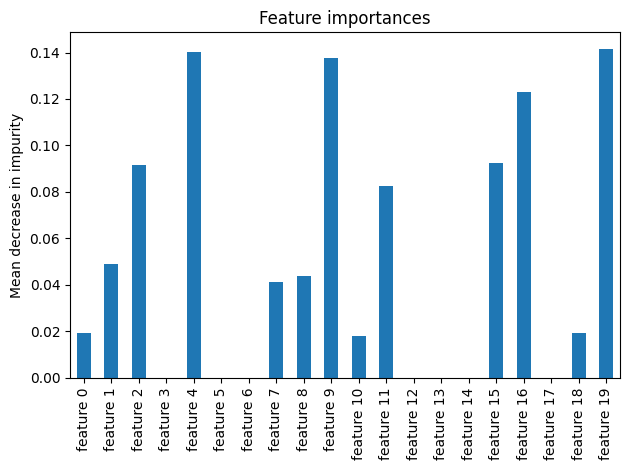

In [11]:
#Train an AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

# Train a new AdaBoostClassifier on the current data
model_ada = AdaBoostClassifier(n_estimators=50)
model_ada.fit(X_train, y_train)

importances = model_ada.feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

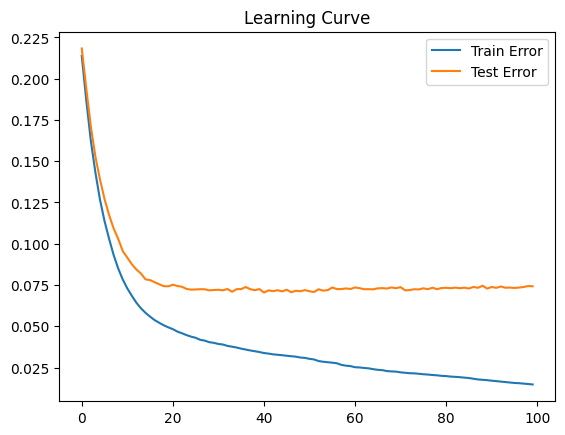

In [12]:
#Train a Gradient Boosting Regressor and plot learning curves
train_errors = []
test_errors = []

for n in range(1, 101):
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.legend()
plt.title("Learning Curve")
plt.show()


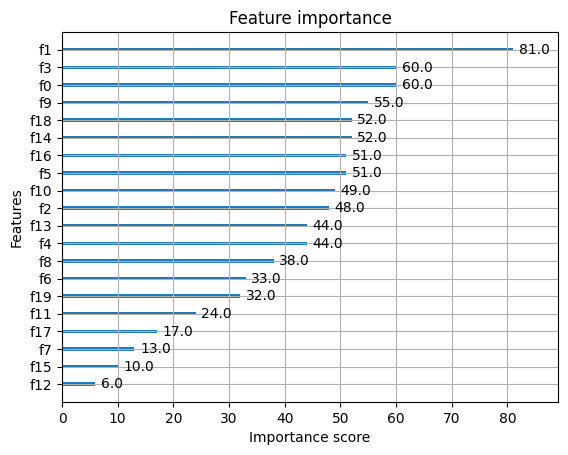

In [13]:
#Train an XGBoost Classifier and visualize feature importance
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)
plt.show()


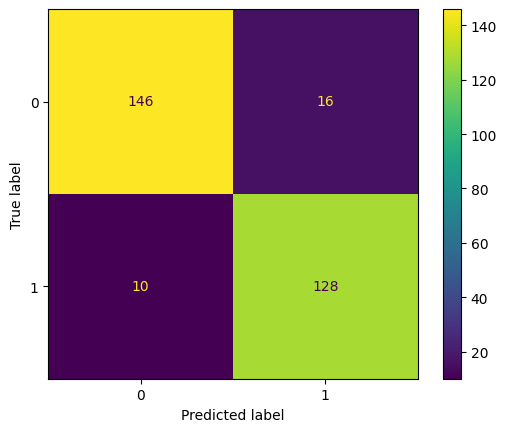

In [14]:
#Train a CatBoost Classifier and plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [15]:
#Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print(f"n_estimators={n}, Accuracy={model.score(X_test, y_test)}")


n_estimators=10, Accuracy=0.8566666666666667
n_estimators=50, Accuracy=0.91
n_estimators=100, Accuracy=0.9
n_estimators=200, Accuracy=0.8933333333333333


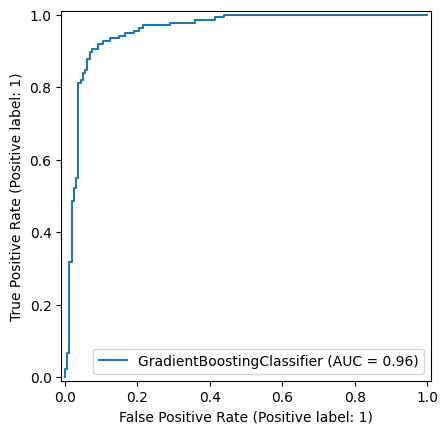

In [16]:
#Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.metrics import RocCurveDisplay

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [17]:
#Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best learning rate:", grid.best_params_)


Best learning rate: {'learning_rate': 0.1}


In [18]:
#Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
model = CatBoostClassifier(scale_pos_weight=5, verbose=0)
model.fit(X_train, y_train)
print("Accuracy with class weighting:", model.score(X_test, y_test))


Accuracy with class weighting: 0.88


In [19]:
# Train an AdaBoost Classifier and analyze the effect of different learning rates
for lr in [0.01, 0.1, 0.5, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    print(f"Learning rate={lr}, Accuracy={model.score(X_test, y_test)}")


Learning rate=0.01, Accuracy=0.85
Learning rate=0.1, Accuracy=0.8533333333333334
Learning rate=0.5, Accuracy=0.8566666666666667
Learning rate=1.0, Accuracy=0.91


In [20]:
# Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBClassifier(objective='multi:softprob')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_pred_proba))


Log Loss: 0.009982810029811636
